In [1]:
from google.colab import files

uploaded = files.upload()

Saving 1- mental-illnesses-prevalence.csv to 1- mental-illnesses-prevalence.csv


In [7]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset
df = pd.read_csv('mental-illnesses-prevalence.csv')  # atau lokasi lokal jika sudah diunggah

# 3. Ambil fitur gangguan mental saja
mental_cols = df.columns[3:]
df_mental = df[mental_cols].copy()

# 4. Buat target biner: risiko gangguan mental tinggi jika total > 10%
df_mental['total'] = df_mental.sum(axis=1)
df_mental['risk'] = df_mental['total'].apply(lambda x: 1 if x > 10 else 0)

# 5. Siapkan data untuk training
X = df_mental.drop(columns=['total', 'risk'])
y = df_mental['risk']

# 6. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 8. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 9. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Training sukses")

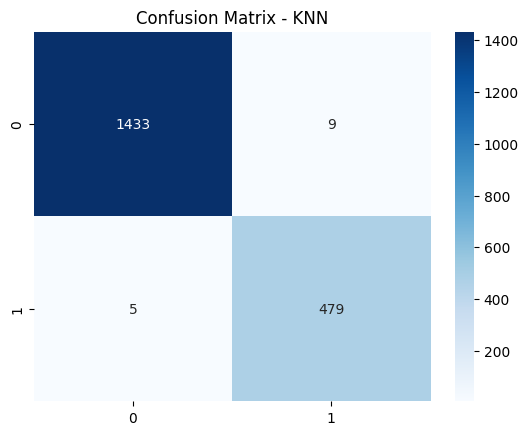

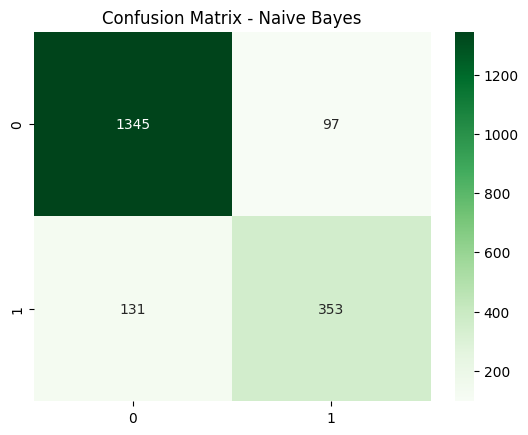

HASIL AKURASI PERBANDINGAN DARI METODE KNN DAN NB
Akurasi KNN: 0.99
Akurasi Naive Bayes: 0.88

Laporan KNN:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1442
           1       0.98      0.99      0.99       484

    accuracy                           0.99      1926
   macro avg       0.99      0.99      0.99      1926
weighted avg       0.99      0.99      0.99      1926


Laporan Naive Bayes:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1442
           1       0.78      0.73      0.76       484

    accuracy                           0.88      1926
   macro avg       0.85      0.83      0.84      1926
weighted avg       0.88      0.88      0.88      1926



In [9]:
# Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()

# Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)


print("=================================================")
print("HASIL AKURASI PERBANDINGAN DARI METODE KNN DAN NB")
print("=================================================")

print(f"Akurasi KNN: {acc_knn:.2f}")
print(f"Akurasi Naive Bayes: {acc_nb:.2f}")

print("\nLaporan KNN:")
print(classification_report(y_test, y_pred_knn))

print("\nLaporan Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
